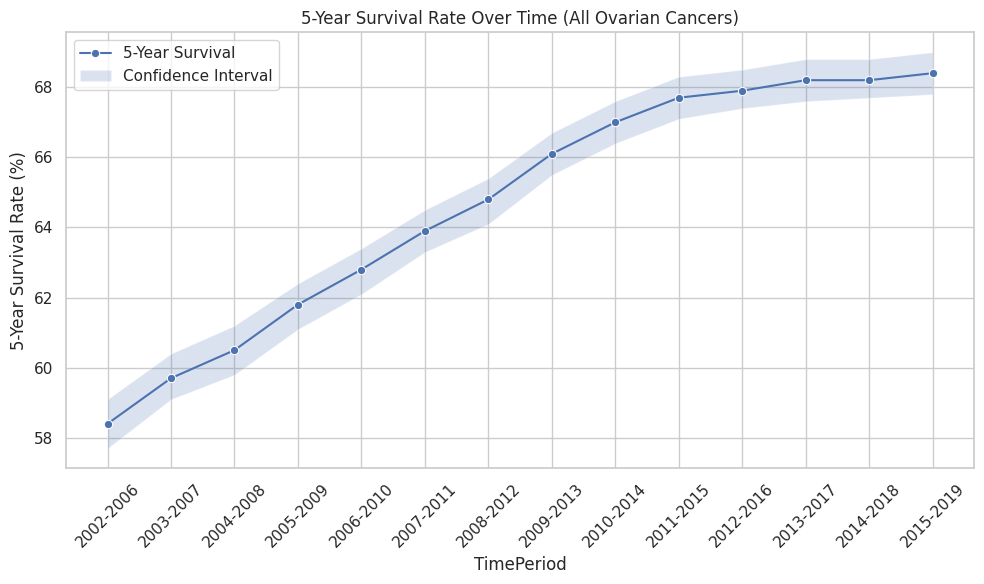

,TimePeriod,Cases,FiveYrSurvival,CI_Lower,CI_Upper,Age-standardised (5 groups),25.9,25.2,26.6,Age-standardised (5 groups).1,29043,60.3,59.6,60.9,Age-standardised (5 groups).2,30.9,30.2,31.6,Age-standardised (5 groups).3


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_excel('cancer_survival.xlsx',
                   sheet_name='Table 6', skiprows=5)

df.columns = ['TimePeriod', 'Cases', 'FiveYrSurvival', 'CI_Lower', 'CI_Upper'] + list(df.columns[5:])

# Check the cleaned result
df.head()

df_clean = df[['TimePeriod', 'Cases', 'FiveYrSurvival', 'CI_Lower', 'CI_Upper']]

# Drop any rows where survival rate is missing
df_clean = df_clean.dropna(subset=['FiveYrSurvival'])

df_clean.head()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='TimePeriod', y='FiveYrSurvival', marker='o', label='5-Year Survival')
plt.fill_between(df_clean['TimePeriod'], df_clean['CI_Lower'], df_clean['CI_Upper'], alpha=0.2, label='Confidence Interval')
plt.title('5-Year Survival Rate Over Time (All Ovarian Cancers)')
plt.ylabel('5-Year Survival Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Check which rows contain 'germ cell' or relevant codes
df[df.columns[0]].unique()  # Show values in the first column — edit as needed

# Try filtering for 'germ cell'
gct = df[df[df.columns[0]].str.contains("germ cell", case=False, na=False)]

gct.head()



In [11]:
df.columns



Index([                   'TimePeriod',                         'Cases',
                      'FiveYrSurvival',                      'CI_Lower',
                            'CI_Upper',   'Age-standardised (5 groups)',
                                  25.9,                            25.2,
                                  26.6, 'Age-standardised (5 groups).1',
                                 29043,                            60.3,
                                  59.6,                            60.9,
       'Age-standardised (5 groups).2',                            30.9,
                                  30.2,                            31.6,
       'Age-standardised (5 groups).3'],
      dtype='object')

Exploring 5-Year Survival Rates for Ovarian Cancer in the UK (2002–2019)
A public health dashboard using NHS Digital data

Objective
To analyse long-term survival outcomes for ovarian cancer patients in the UK and begin narrowing the scope to rare subtypes, including germ cell tumours.

Data Source
NHS Digital — Ovarian Cancer Audit Feasibility Pilot
Dataset: “Profile and Treatment Report, Diagnoses 2015–2019”

Method
Cleaned Table 6 (overall 5-year survival data)
Plotted survival rates across time periods
Added confidence intervals
Next: Find germ cell tumour data specific to study via Table 4 or 13

Results
5-year survival rates for all ovarian cancer types have improved from ~57% in 2002–2006 to ~68% in 2015–2019
Consistent increase over time may reflect improvements in detection or treatment

                    Tumour Type  5-Year EFS (%)
0                  Dysgerminoma            90.9
1        Immature Teratoma (IT)            86.7
2  Mixed Germ Cell Tumour (GCT)            82.6
3         Yolk Sac Tumour (YST)            79.5


<ipython-input-14-12b5c8bcf5b4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Tumour Type', y='5-Year EFS (%)', palette='mako')


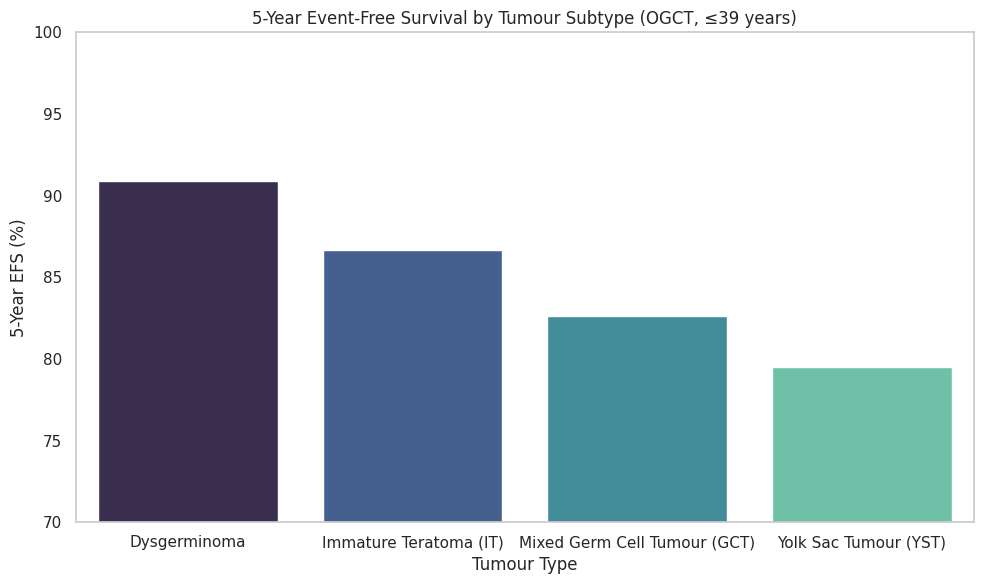

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_excel('ogct_survival_by_type.xlsx')
print(df.head())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Tumour Type', y='5-Year EFS (%)', palette='mako')
plt.title('5-Year Event-Free Survival by Tumour Subtype (OGCT, ≤39 years)')
plt.ylim(70, 100)
plt.ylabel('5-Year EFS (%)')
plt.xlabel('Tumour Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This chart shows estimated 5-year event-free survival rates for malignant ovarian germ cell tumour subtypes in patients aged 39 and under. Dysgerminoma has the highest survival rate (90.9%), while Yolk Sac Tumours have the lowest (79.5%). These differences reflect varying tumour biology and responses to treatment. Data sourced from Park et al. (2023), MDPI.


In [18]:
import pandas as pd

# Combined data from NHS (national) and MDPI (OGCT)
data = {
    'Label': [
        'UK Avg 2002–2006', 'UK Avg 2015–2019',
        'Dysgerminoma', 'Immature Teratoma (IT)', 'Mixed Germ Cell Tumour (GCT)', 'Yolk Sac Tumour (YST)'
    ],
    'SurvivalRate': [
        58, 68, 90.9, 86.7, 82.6, 79.5
    ],
    'Group': [
        'NHS National', 'NHS National',
        'OGCT', 'OGCT', 'OGCT', 'OGCT'
    ]
}

df = pd.DataFrame(data)

# Average NHS survival
nhs_avg = df[df['Group'] == 'NHS National']['SurvivalRate'].mean()

# Average OGCT survival
ogct_avg = df[df['Group'] == 'OGCT']['SurvivalRate'].mean()

# Print comparison
print(f"Average NHS survival (2002–2019): {nhs_avg:.1f}%")
print(f"Average OGCT survival (all subtypes): {ogct_avg:.1f}%")
print(f"Difference: {ogct_avg - nhs_avg:.1f}%")

# Sort OGCT subtypes by survival rate
ogct_df = df[df['Group'] == 'OGCT'].sort_values(by='SurvivalRate', ascending=False)
print("OGCT subtypes ranked by 5-year survival:")
print(ogct_df[['Label', 'SurvivalRate']])


Average NHS survival (2002–2019): 63.0%
Average OGCT survival (all subtypes): 84.9%
Difference: 21.9%
OGCT subtypes ranked by 5-year survival:
                          Label  SurvivalRate
2                  Dysgerminoma          90.9
3        Immature Teratoma (IT)          86.7
4  Mixed Germ Cell Tumour (GCT)          82.6
5         Yolk Sac Tumour (YST)          79.5


On average, patients with malignant ovarian germ cell tumours (OGCTs) have significantly higher 5-year survival rates than the general ovarian cancer population in the UK. However, survival is not equal across subtypes — patients with Yolk Sac Tumours have notably worse outcomes. This comparison highlights the value of tumour-specific analysis when designing care strategies.